# Project 1 : EDA using Python

## Libraries Used
* Pandas
* Numpy
* Matplotlib
* Seaborn

Input Dataset: 1000 Rows


## Step 1: Importing Libraries & Fetching Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sbn
import warnings

plt.style.use('ggplot')
# pd.set_option('max_columns', 200)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [2]:
df = pd.read_csv('/kaggle/input/roller-coaster-dataset/coaster_db.csv')

## Step 1: Data Understanding

* Dataframe shape
* head() and tail()
* dtypes
* describe()
* info()

In [3]:
# Qucik summarize numeric data to get a basic picture of the data
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


In [4]:
# Checking the info on the data, column info and row counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1087 non-null   object 
 1   Length                         953 non-null    object 
 2   Speed                          937 non-null    object 
 3   Location                       1087 non-null   object 
 4   Status                         874 non-null    object 
 5   Opening date                   837 non-null    object 
 6   Type                           1087 non-null   object 
 7   Manufacturer                   1028 non-null   object 
 8   Height restriction             831 non-null    object 
 9   Model                          744 non-null    object 
 10  Height                         965 non-null    object 
 11  Inversions                     932 non-null    float64
 12  Lift/launch system             795 non-null    o

## Step 2: Data Preperation

* Dropping Irrelevant Columns & Rows
* Identifying Duplicated Columns
* Renaming Columns
* Feature Creation

In [5]:
# Selecting only necessary columns
df = df[['coaster_name', 
    # 'Length', 'Speed', 
    'Location', 'Status', 
    # 'Opening date',
       # 'Type', 
    'Manufacturer', 
    # 'Height restriction', 'Model', 'Height',
       # 'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       # 'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       # 'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       # 'Track layout', 'Fastrack available', 'Soft opening date.1',
       # 'Closing date', 'Opened', 'Replaced by', 'Website',
       # 'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       # 'Single rider line available', 'Restraint Style',
       # 'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
        'year_introduced', 'latitude', 'longitude', 'Type_Main',
        'opening_date_clean', 
    # 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
    # 'height_value', 'height_unit', 
    'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

In [6]:
# Changing Date column from object to a date time format
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])

In [7]:
# Rename our columns to better versions
df = df.rename(columns={'coaster_name': 'Coaster_Name',
                     'year_introduced': 'Year_Introduced',
                     'latitude': 'Latitude',
                     'longitude': 'Longitude',
                     'opening_date_clean': 'Opening_Date',
                     'speed_mph': 'Speed_mph',
                     'height_ft': 'Height_ft',
                     'Inversions_clean': 'Inversions',
                     'Gforce_clean': 'Gforce'
})

In [8]:
df.head()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [9]:
# Finding missing values per columns

df.isna().sum()

Coaster_Name         0
Location             0
Status             213
Manufacturer        59
Year_Introduced      0
Latitude           275
Longitude          275
Type_Main            0
Opening_Date       250
Speed_mph          150
Height_ft          916
Inversions           0
Gforce             725
dtype: int64

In [10]:
# Finding duplicate values in overall dataframe
# -- unique here will be combination of all the row values

df.duplicated().sum()


0

In [11]:
# Finding duplicate values in subset of dataframe

df.loc[df.duplicated(subset=['Coaster_Name'])].head(5)

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN


In [12]:
# Fetching data using a where condition on Column value
# -- in the fetched example, the year_introduced is different, 
# -- which is not correct, we would take 1st introduced year i.e. 1926

df.query('Coaster_Name == "Crystal Beach Cyclone"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [13]:
# We will remove duplicates if certain columns have same value
# Since the index of duplicated rows is not carried , 
# -- we have to create a new index column and drop the provious one

df = df.loc[~df.duplicated(subset=['Coaster_Name','Location','Opening_Date'])] \
.reset_index(drop=True).copy()

In [14]:
df.shape

(990, 13)

## Step 3: Feature Understanding

(Univariate Analysis)

* Plotting Feature Distributions
    * Histogram
    * KDE
    * Box Plot

Text(0, 0.5, 'Number of Coasters')

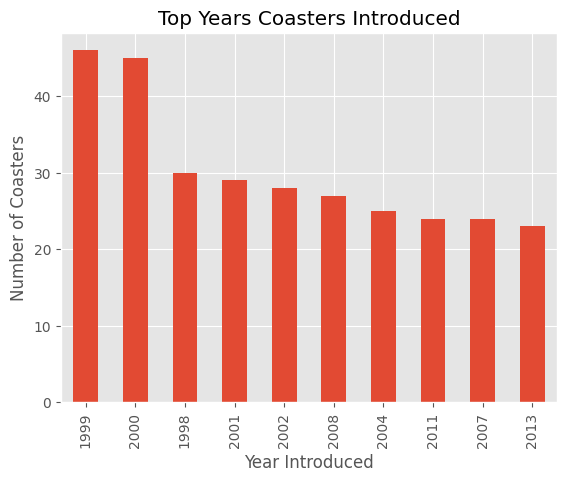

In [15]:
ax = df['Year_Introduced'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top Years Coasters Introduced')

ax.set_xlabel('Year Introduced')
ax.set_ylabel('Number of Coasters')

Text(0, 0.5, 'Frequency')

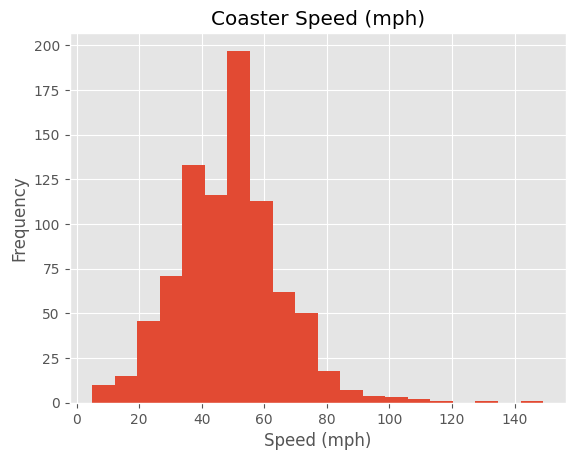

In [16]:
ax = df['Speed_mph'].plot(kind='hist', 
                     bins=20, 
                     title='Coaster Speed (mph)')

ax.set_xlabel('Speed (mph)')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

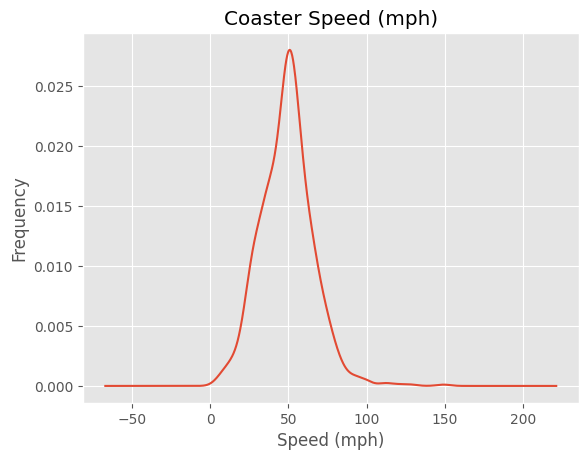

In [17]:
ax = df['Speed_mph'].plot(kind='kde', 
                     title='Coaster Speed (mph)')

ax.set_xlabel('Speed (mph)')
ax.set_ylabel('Frequency')